### plot formatting

1. [controlling the legend](http://pandas.pydata.org/pandas-docs/stable/visualization.html#controlling-the-legend)

1. [scales](http://pandas.pydata.org/pandas-docs/stable/visualization.html#scales)

1. [plotting on a secondary y-axis](http://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-on-a-secondary-y-axis)

1. [suppressing tick resolution adjustment](http://pandas.pydata.org/pandas-docs/stable/visualization.html#suppressing-tick-resolution-adjustment)

1. [subplots](http://pandas.pydata.org/pandas-docs/stable/visualization.html#subplots)

1. [using layout and targetting multiple axes](http://pandas.pydata.org/pandas-docs/stable/visualization.html#using-layout-and-targetting-multiple-axes)

1. [plotting with error bars](http://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars)

1. [plotting tables](http://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-tables)

1. [colormaps](http://pandas.pydata.org/pandas-docs/stable/visualization.html#colormaps)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

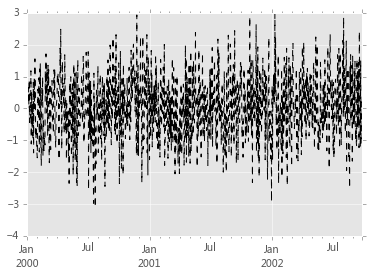

In [2]:
data = np.random.randn(1000)
days = pd.date_range('2000-01-01', periods=1000)
ts = pd.Series(data, index=days)
plt.figure()
ts.plot(style='k--', label='Series')

### controlling the legend

`legend=False` to hide legend

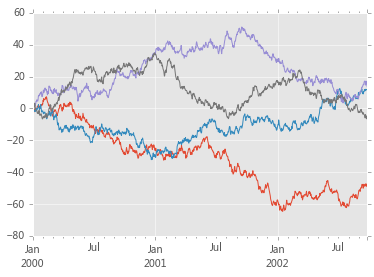

In [3]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(legend=False)

### scales

pass `logy` to get a log-scale `y` axis

see also the `logx` and `loglog` keyword

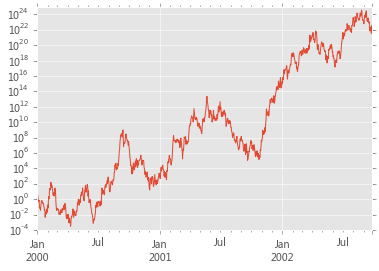

In [4]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('2000-01-01', periods=1000))
ts = np.exp(ts.cumsum())
ts.plot(logy=True)

### plotting on a secondary y-axis

use the `secondary_y` keyword

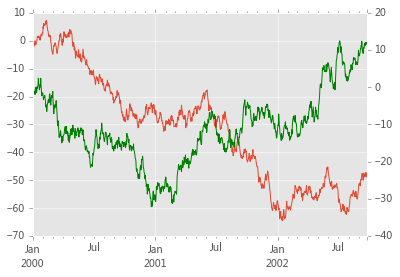

In [5]:
df.A.plot()
df.B.plot(secondary_y=True, style='g')

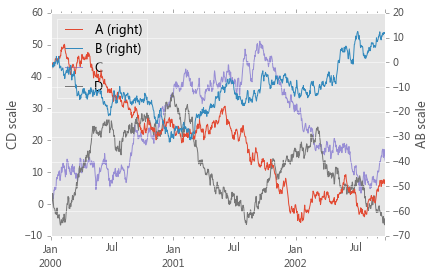

In [6]:
# to plot some columns in a df
# give the column names to the `secondary_y` keyword
plt.figure()
ax = df.plot(secondary_y=['A', 'B'])
ax.set_ylabel('CD scale')
ax.right_ax.set_ylabel('AB scale')

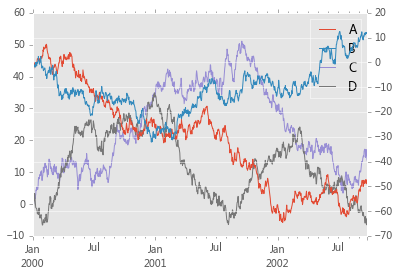

In [7]:
# use `mark_right=False` to turn off '(right)'
plt.figure()
df.plot(secondary_y=['A', 'B'], mark_right=False)

### suppressing tick resolution adjustment


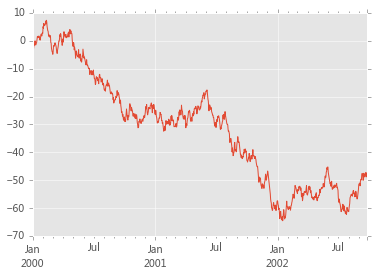

In [8]:
plt.figure()
df.A.plot()

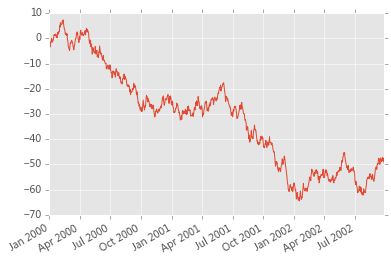

In [9]:
# use `x_compat` parameter
plt.figure()
df.A.plot(x_compat=True)

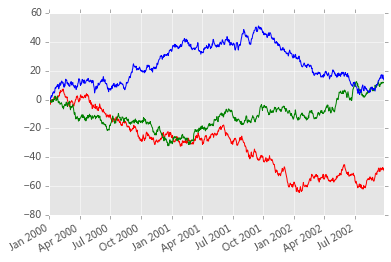

In [10]:
# if you have more than one plot
# that needs to be suppressed
# use `use` method in `pandas.plot_params`
plt.figure()
with pd.plot_params.use('x_compat', True):
    df.A.plot(color='r')
    df.B.plot(color='g')
    df.C.plot(color='b')

### subplots

each series in a df can be plotted on a different axis with `subplots`

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d5c75d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10d7bf2d0>], dtype=object)

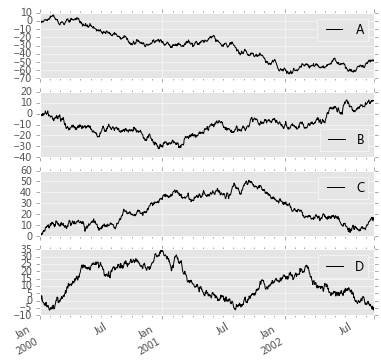

In [11]:
df.plot(subplots=True, figsize=(6, 6))
#df.plot(subplots=True, figsize=(6, 6), x_compat=True)

### using layout and targetting multiple axes

the layout of subplots can be specified by `layout` keyword

it can accept `(rows, columns)`

the `layout` can be used in `hist` and `boxplot` also

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dceb650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e00ec50>]], dtype=object)

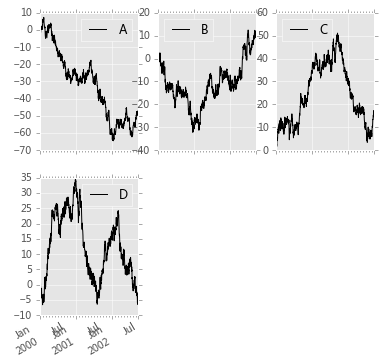

In [12]:
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e651390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f06bf90>]], dtype=object)

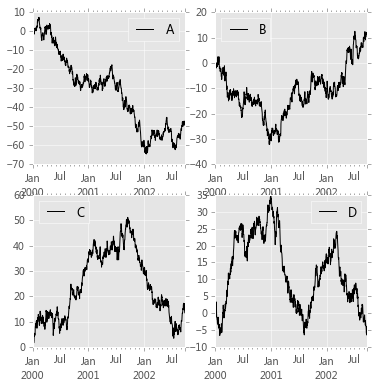

In [13]:
# the above example is indentical to using
df.plot(subplots=True, layout=(2, -1), figsize=(6, 6), sharex=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110669750>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1101a9e10>], dtype=object)

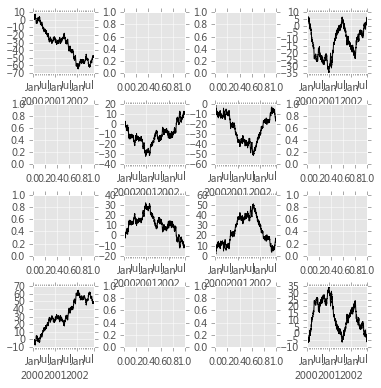

In [14]:
# when multiple axes are passed via `ax` keyword
# `layout`, `sharex` and `sharey` keywords don't affect output
# you should explicity pass `sharex=False` and `sharey=False`
# otherwise you will see a warning
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]
df.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False)
(-df).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False)

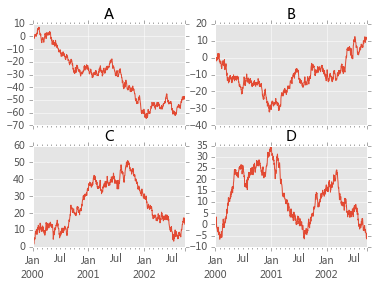

In [15]:
# another option is passing an `ax` argument to `Series.plot`
# to plot on a particular axis
fig, axes = plt.subplots(nrows=2, ncols=2)
df.A.plot(ax=axes[0,0]); axes[0,0].set_title('A')
df.B.plot(ax=axes[0,1]); axes[0,1].set_title('B')
df.C.plot(ax=axes[1,0]); axes[1,0].set_title('C')
df.D.plot(ax=axes[1,1]); axes[1,1].set_title('D')

### plotting with error bars

supported in `Series.plot()` and `DataFrame.plot()`

`xerr` keyword to `plot()` => horizontal errorbars

`yerr` keyword to `plot()` => vertical errorbars

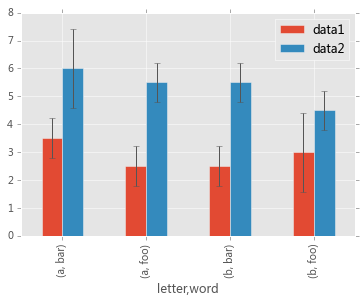

In [16]:
ix3 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                                 ['foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']],
                                names=['letter', 'word'])
df3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2],
                    'data2': [6, 5, 7, 5, 4, 5, 6, 5]},
                   index=ix3)
# group by index labels
# take means and standard deviations for each group
gp3 = df3.groupby(level=('letter', 'word'))
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot(yerr=errors, ax=ax, kind='bar')

### plotting tables

use `table` keyword

supported in `Series.plot()` and `DataFrame.plot()`

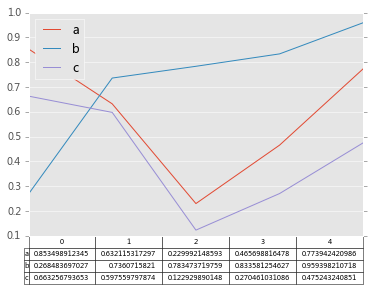

In [17]:
fig, ax = plt.subplots(1, 1)
df = pd.DataFrame(np.random.rand(5, 3), columns=list('abc'))
ax.get_xaxis().set_visible(False)
df.plot(table=True, ax=ax)

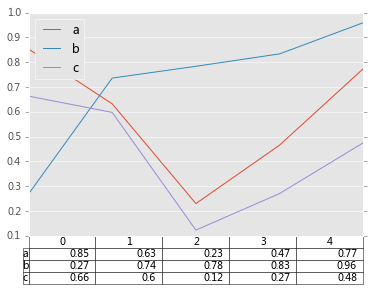

In [18]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
df.plot(table=np.round(df.T, 2), ax=ax)

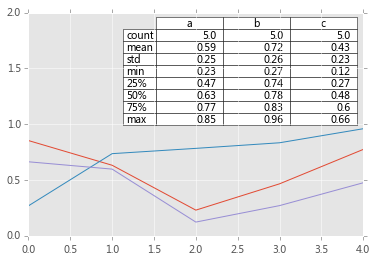

In [19]:
# helper function `pandas.tools.plotting.table`
# to create a table from `Series` and `DataFrame`
from pandas.tools.plotting import table
fig, ax = plt.subplots(1, 1)
table(ax, np.round(df.describe(), 2),
      loc='upper right', colWidths=[0.2, 0.2, 0.2])
df.plot(ax=ax, ylim=(0, 2), legend=None)

note: you can get table instances on the axes

using `axes.tables` property

see the [matplotlib table documentation](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.table)

### colormaps

use `colormap=` argument

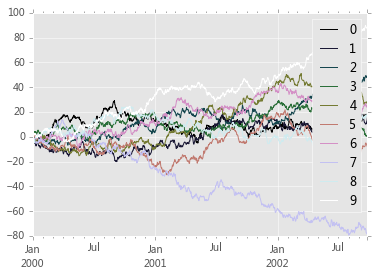

In [20]:
df = pd.DataFrame(np.random.randn(1000, 10), index=ts.index)
df = df.cumsum()
plt.figure()
df.plot(colormap='cubehelix')

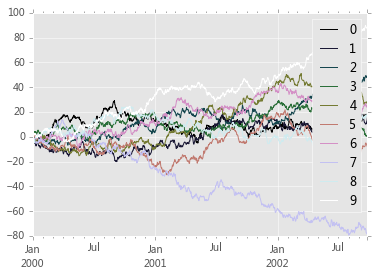

In [21]:
# pass the colormap itself
from matplotlib import cm
plt.figure()
df.plot(colormap=cm.cubehelix)

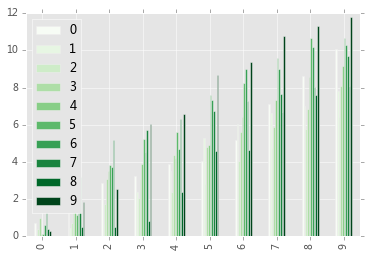

In [22]:
# used for other plot types
# like bar charts
dd = pd.DataFrame(np.random.randn(10, 10)).applymap(abs)
dd = dd.cumsum()
plt.figure()
dd.plot(kind='bar', colormap='Greens')

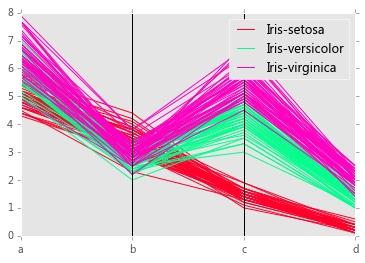

In [23]:
# parallel coordinates charts
from pandas import read_csv
from pandas.tools.plotting import parallel_coordinates
plt.figure()
data = read_csv('iris.data')
parallel_coordinates(data, 'Name', colormap='gist_rainbow')

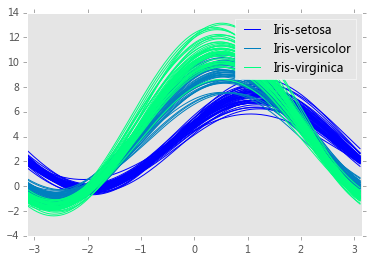

In [24]:
# andrews curves charts
from pandas import read_csv
from pandas.tools.plotting import andrews_curves
andrews_curves(data, 'Name', colormap='winter')